# **Data Analysis on Real Time Social Media Comments**

In [45]:
# Imort Libraries

import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import networkx as nx

In [46]:
# Import Dataset

df = pd.read_csv("/content/VIDEO_COMMENTS.csv")

2. **Data Exploration**

In [47]:
df

,raw_comment,raw_reply,processed_comment,processed_reply
0,Legend Are Watching In 2024 😂,Yeh bro🎉,legend are watching in,yeh bro
1,2024 me dekhne vale hajiri lagao❤😅,Idhar hu bahen,me dekhne vale hajiri lagao,idhar hu bahen
2,Jai shree Ram 🚩🚩🚩,Lindus,jai shree ram,lindus
3,Kaun Kaun 2050 main dekh rahe hai,🤚mai,kaun kaun main dekh rahe hai,mai
4,Kaun Kaun 2050 main dekh rahe hai,Ek saal jaldi aagya 2049,kaun kaun main dekh rahe hai,ek saal jaldi aagya
...,...,...,...,...
69,🕉️🕉️🕉️कौन कौन भगवान पर विश्वास एवं भरोसा करते ...,LM to get it to you on the same mlkmmmm th of ...,,lm to get it to you on the same mlkmmmm th of ...
70,🕉️🕉️🕉️कौन कौन भगवान पर विश्वास एवं भरोसा करते ...,Lmkm llllkm you are the best way is to be the ...,,lmkm llllkm you are the best way is to be the ...
71,🕉️🕉️🕉️कौन कौन भगवान पर विश्वास एवं भरोसा करते ...,Har Har Mahadev,,har har mahadev
72,Jijaji chhat par hai ka season 3 kab aye ga,छत से नीचे उतरेंगे तब🤣,jijaji chhat par hai ka season kab aye ga,


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   raw_comment        74 non-null     object
 1   raw_reply          74 non-null     object
 2   processed_comment  72 non-null     object
 3   processed_reply    62 non-null     object
dtypes: object(4)
memory usage: 2.4+ KB


In [78]:
print(df.columns)

Index(['raw_comment', 'raw_reply', 'processed_comment', 'processed_reply',
       'comment_length'],
      dtype='object')


In [49]:
df.describe()

,raw_comment,raw_reply,processed_comment,processed_reply
count,74,74,72,62
unique,44,67,42,59
top,TMKOC+EATING=JANNAT,❤,feb ko kaun kaun dekh rha h,mai
freq,5,3,5,2


In [50]:
df.isnull().sum()

raw_comment           0
raw_reply             0
processed_comment     2
processed_reply      12
dtype: int64

In [51]:
print(df.shape)

(74, 4)


3. **Data Cleaning**

In [52]:
df['processed_comment'] = df['processed_comment'].str.strip()
df['processed_reply'] = df['processed_reply'].str.strip()

In [53]:
df['processed_comment'] = df['processed_comment'].str.lower()
df['processed_reply'] = df['processed_reply'].str.lower()

In [54]:
def replace_special_chars(text):
  # Remove all special characters and emojis
  text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
  # Replace multiple spaces with a single space
  text = re.sub(r'\s+', ' ', text)
  return text

In [55]:
special_chars_map = {
    'ðŸ˜‚': '😂',
    'ðŸŽ‰': '🎉',
    'ðŸš©': '🚀',
    'ðŸ¤š': '🤚',
    'â¤': '❤️',
    'à¥¤': '💫',
}

In [56]:
df.replace({'processed_comment': special_chars_map, 'processed_reply': special_chars_map}, regex=True, inplace=True)

In [57]:
df.drop_duplicates(inplace=True)

In [58]:
df.dropna(inplace=True)

In [59]:
df

,raw_comment,raw_reply,processed_comment,processed_reply
0,Legend Are Watching In 2024 😂,Yeh bro🎉,legend are watching in,yeh bro
1,2024 me dekhne vale hajiri lagao❤😅,Idhar hu bahen,me dekhne vale hajiri lagao,idhar hu bahen
2,Jai shree Ram 🚩🚩🚩,Lindus,jai shree ram,lindus
3,Kaun Kaun 2050 main dekh rahe hai,🤚mai,kaun kaun main dekh rahe hai,mai
4,Kaun Kaun 2050 main dekh rahe hai,Ek saal jaldi aagya 2049,kaun kaun main dekh rahe hai,ek saal jaldi aagya
5,Khana khaate time kon kon ye show dekhta hai❤🎉,Abhi dekh rha hu,khana khaate time kon kon ye show dekhta hai,abhi dekh rha hu
7,Khna khate time kon kon dekhra 2024 m attenden...,Mai Roj dekh ta। Hu roti kha te,khna khate time kon kon dekhra m attendence l...,mai roj dekh ta hu roti kha te
8,17 Feb 2024 ko kaun kaun dekh rha h😂😂😂😂😂,Me😂😂😂😂,feb ko kaun kaun dekh rha h,me
10,17 Feb 2024 ko kaun kaun dekh rha h😂😂😂😂😂,Me 😂😂😂😂,feb ko kaun kaun dekh rha h,me
12,17 Feb 2024 ko kaun kaun dekh rha h😂😂😂😂😂,mai daily khana khate tym dekhti hu,feb ko kaun kaun dekh rha h,mai daily khana khate tym dekhti hu


In [60]:
df.to_csv('cleaned_data.csv', index=False)

# **4. Data Vizualizations**

In [70]:
# Bar Plot

reply_counts = df['processed_reply'].value_counts()

<ipython-input-62-ab45baaa9166>:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


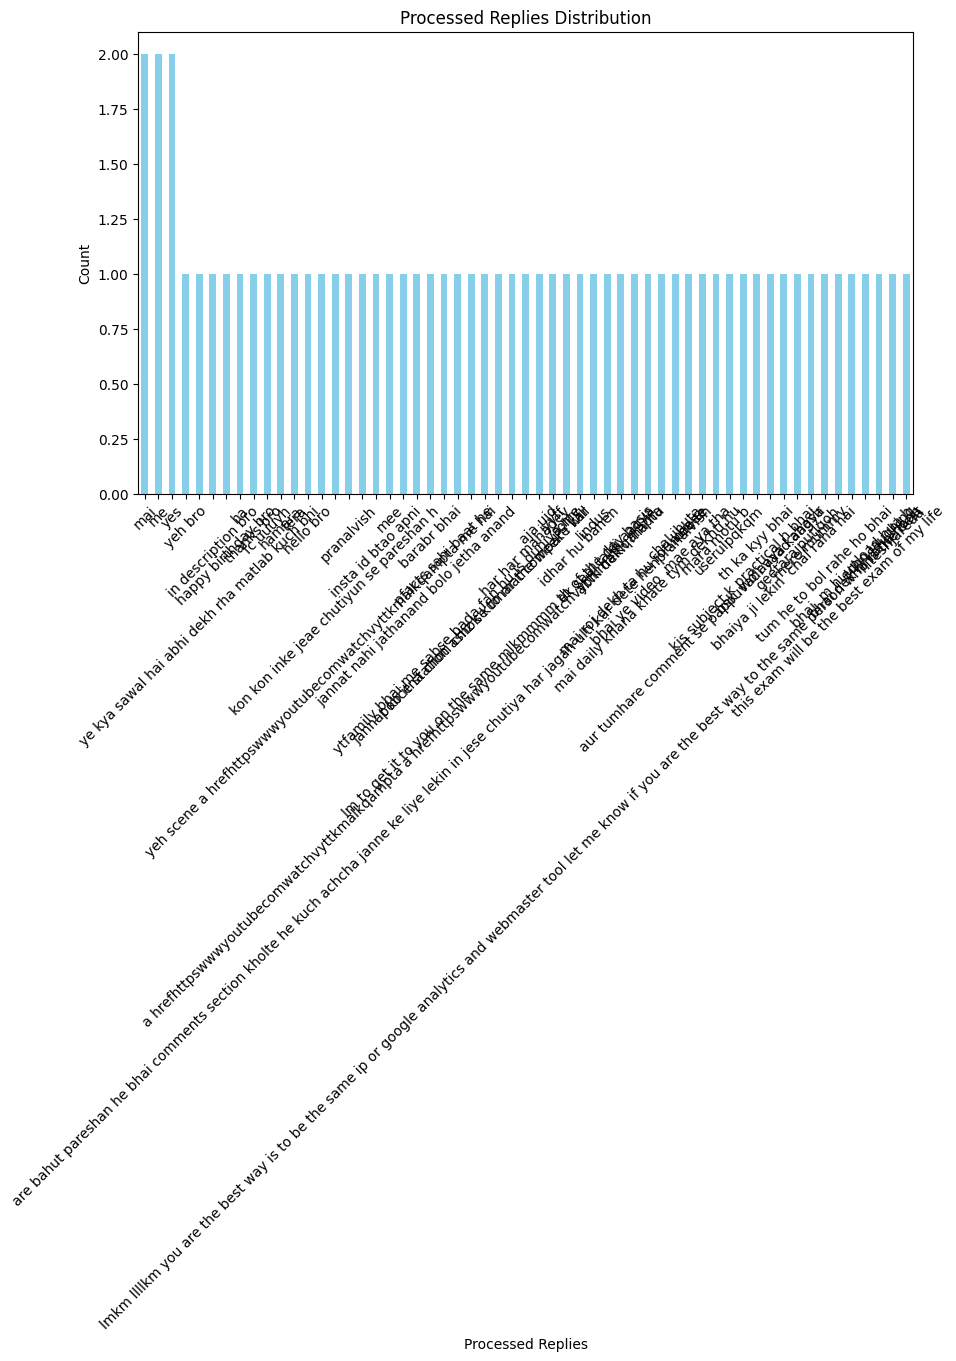

In [62]:
plt.figure(figsize=(10, 6))
reply_counts.plot(kind='bar', color='skyblue')
plt.title('Processed Replies Distribution')
plt.xlabel('Processed Replies')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [71]:
# WordCloud

comment_text = ' '.join(df['processed_comment'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(comment_text)

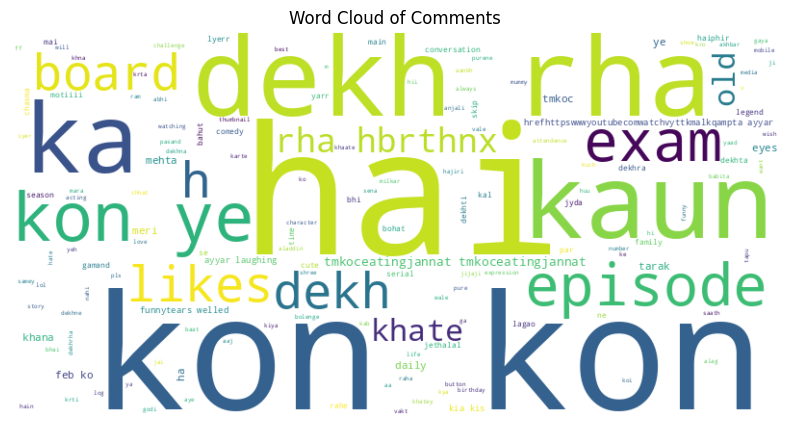

In [64]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Comments')
plt.show()

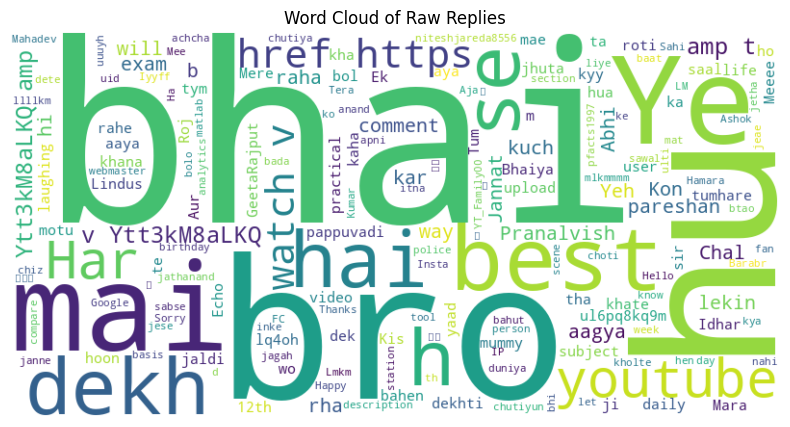

In [83]:
reply_text = ' '.join(df['raw_reply'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(reply_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Raw Replies')
plt.show()

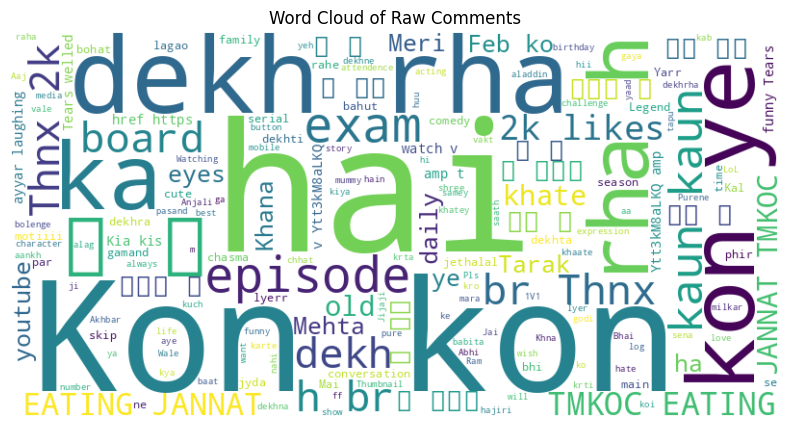

In [84]:
comment_text = ' '.join(df['raw_comment'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(comment_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Raw Comments')
plt.show()

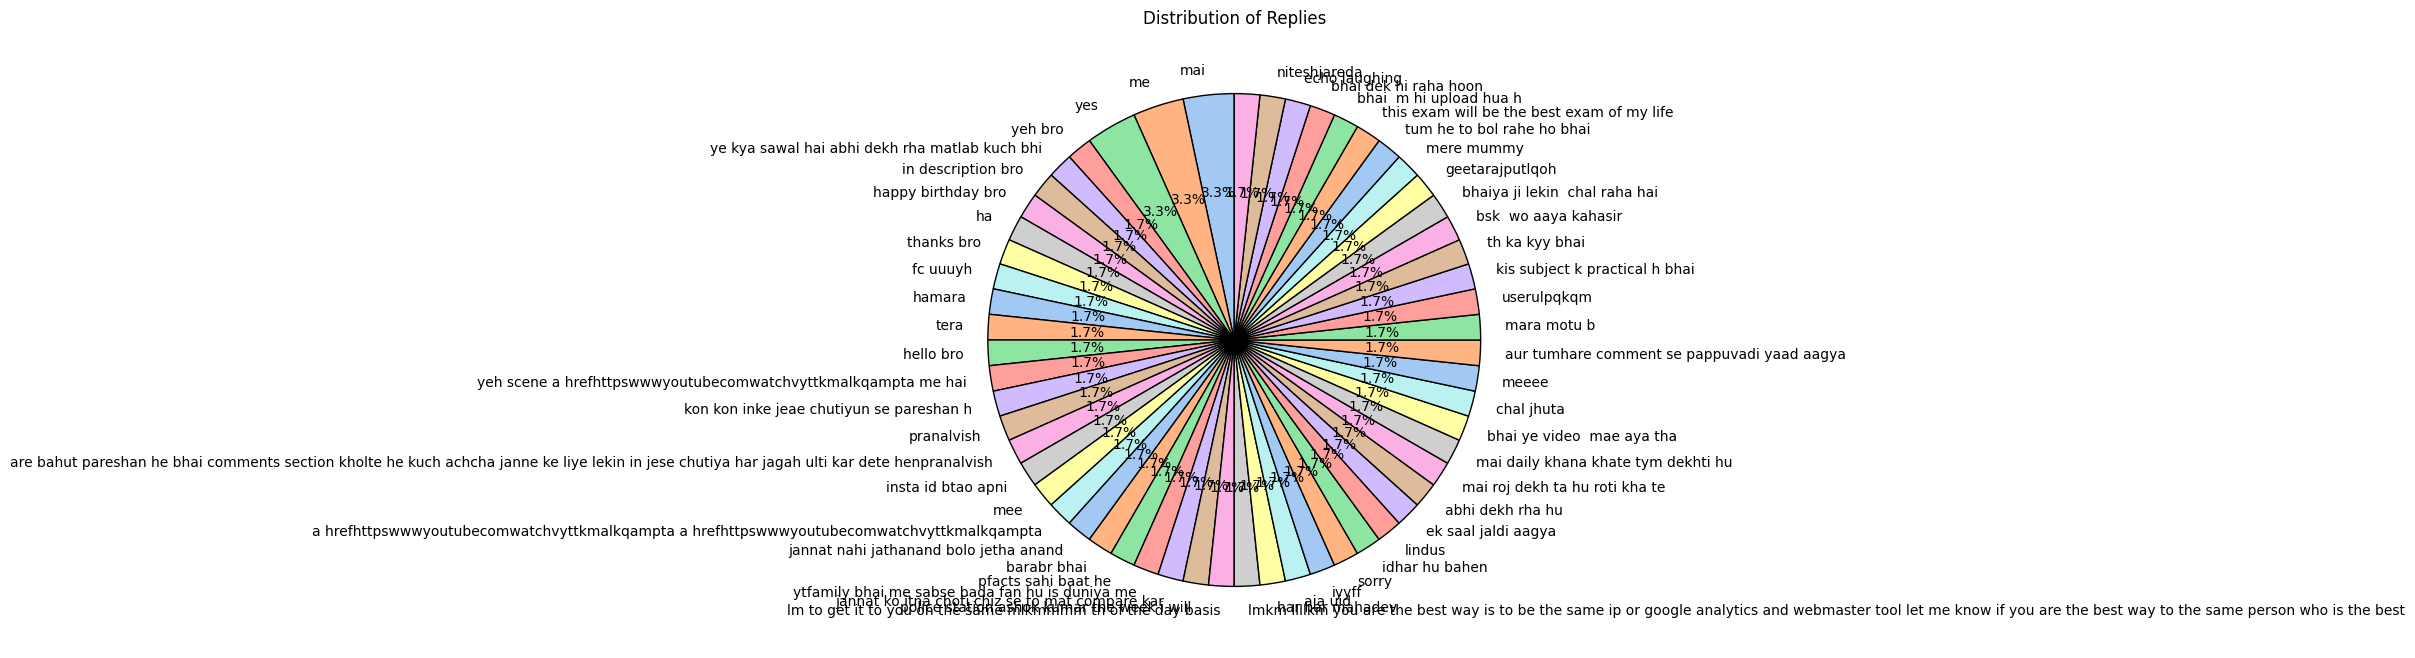

In [72]:
# Pie Chart

plt.figure(figsize=(8, 8))
df['processed_reply'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'), wedgeprops={'edgecolor': 'black'})
plt.title('Distribution of Replies')
plt.ylabel('')
plt.show()

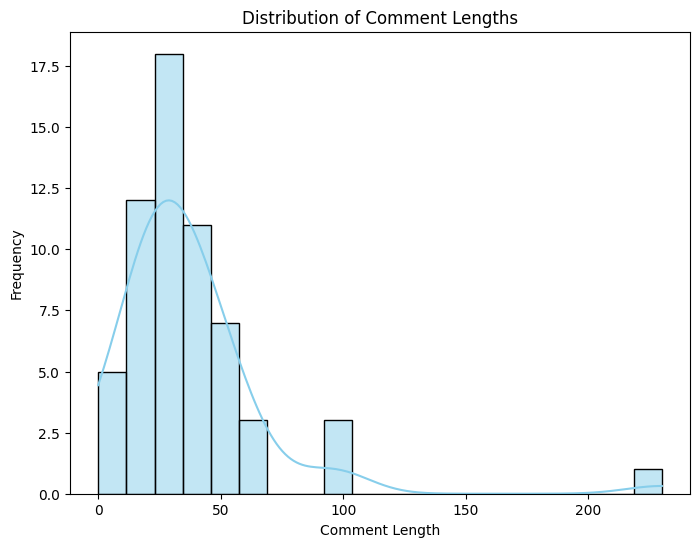

In [73]:
# Bar Plot

plt.figure(figsize=(8, 6))
df['comment_length'] = df['processed_comment'].apply(len)
sns.histplot(df['comment_length'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Comment Lengths')
plt.xlabel('Comment Length')
plt.ylabel('Frequency')
plt.show()

In [74]:
# Bar Plot

unique_comments = df['processed_comment'].nunique()
unique_replies = df['processed_reply'].nunique()

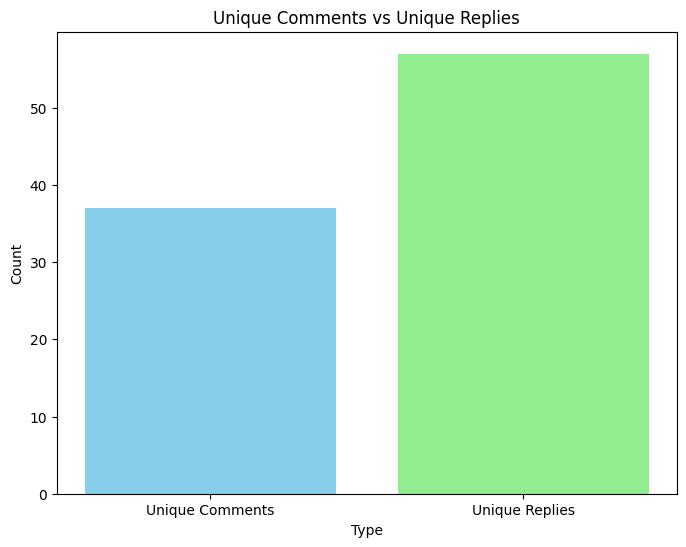

In [68]:
plt.figure(figsize=(8, 6))
plt.bar(['Unique Comments', 'Unique Replies'], [unique_comments, unique_replies], color=['skyblue', 'lightgreen'])
plt.title('Unique Comments vs Unique Replies')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

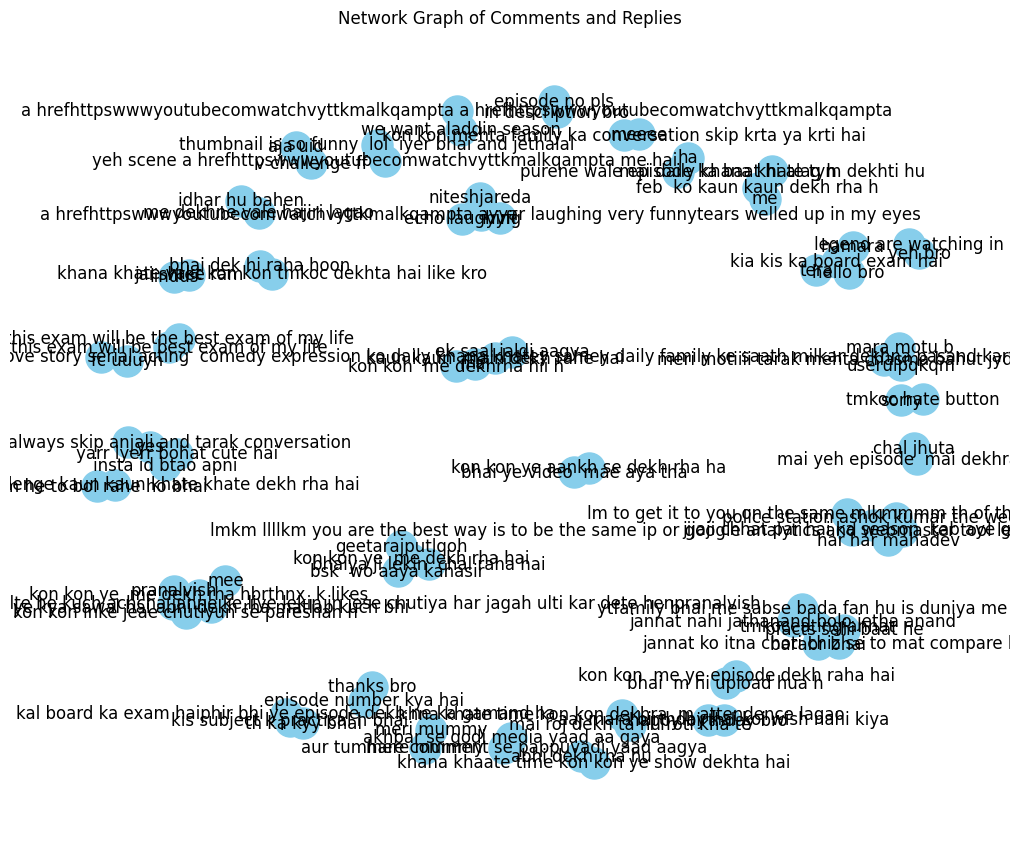

In [75]:
# Network Analysis Graph

G = nx.Graph()
for index, row in df.iterrows():
    G.add_edge(row['processed_comment'], row['processed_reply'])

plt.figure(figsize=(10, 8))
nx.draw(G, with_labels=True, node_color='skyblue', node_size=500, edge_color='gray')
plt.title('Network Graph of Comments and Replies')
plt.show()

<ipython-input-85-01de4f1bc03b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='processed_reply', y='comment_length', palette='Set2')


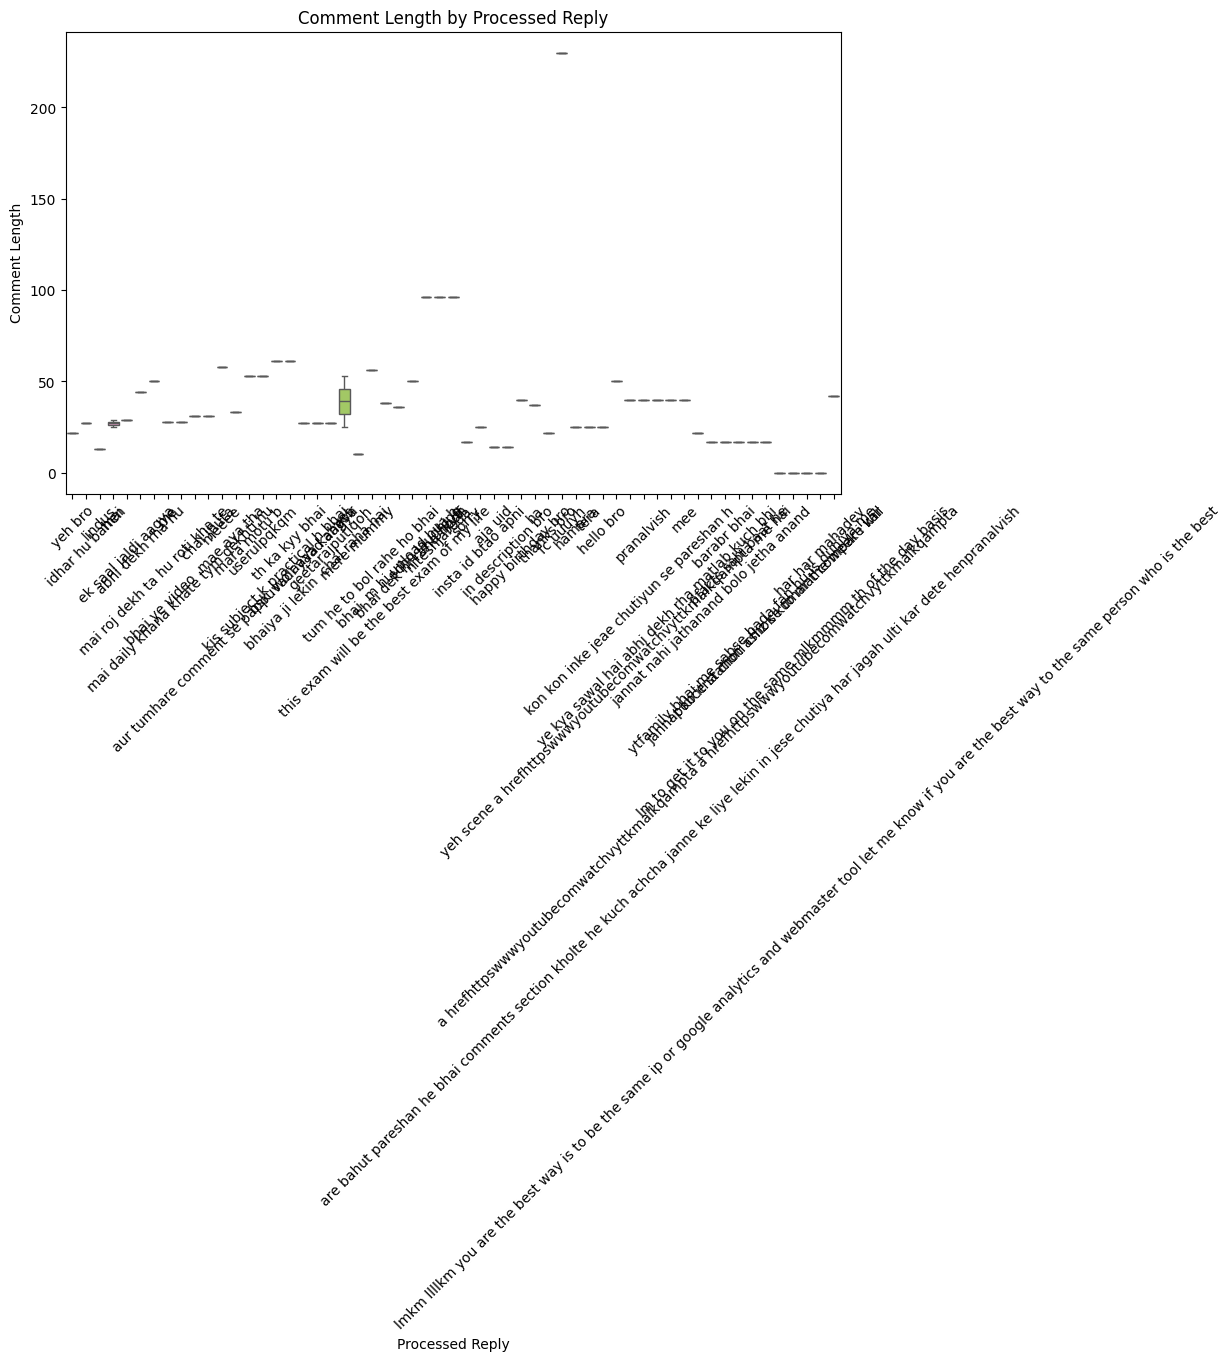

In [85]:
# Box Plot

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='processed_reply', y='comment_length', palette='Set2')
plt.title('Comment Length by Processed Reply')
plt.xlabel('Processed Reply')
plt.ylabel('Comment Length')
plt.xticks(rotation=45)
plt.show()